In [116]:
import fitsio
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations, permutations

In [117]:
def compute_probability_distribution(data):
    s = np.shape(data)
    n_side = 2
    n_x = s[0]-1
    n_y = s[1]-1

    
    sorts = {}
    for i in range(0,n_x):
        for j in range(0,n_y):
            tmp = data[i : i+n_side, j:j+n_side].flatten()
            sorted_ids = np.int_(np.argsort(tmp))
            s = ''.join(str(j) for j in sorted_ids)
            try:
                sorts[s] += 1
            except:
                sorts[s] = 1
    
    # return the probabilities in the order provided by the permutations routine
    a = '0123'
    perms = permutations(a, 4)
    sorted_perms = []
    for p in perms:
        sorted_perms.append(''.join(i for i in p))
        
    values = []
    for p in sorted_perms:
        values.append(sorts[p])
    values = np.array(values)
    values = values/np.sum(values)
    
    
    return values

In [118]:
def read_sky_sframe(sframe_file):
    h = fitsio.FITS(sframe_file)
    sel = h["FIBERMAP"]["OBJTYPE"].read() == "SKY"
    sky = h["FLUX"].read()[sel,:]
    return sky

In [119]:
def compute_entropy(proba_values):
    p = np.array(proba_values)
    entropy = np.sum(-p*np.log2(p))/np.log2(len(p))
    return entropy

In [120]:
def compute_camera_entropy(exp_path, date, expid, band):
    n_petals = 10
    skyb_petals = []
    for i in range(n_petals):
        filename = '{}/{}/{:08d}/sframe-{}{}-{:08d}.fits'.format(exp_path, date, expid, band, i, expid)
        skyb_petals.append(read_sky_sframe(filename))
        #print('read ', i)
    
    p_skyb_petals = []
    for i in range(n_petals):
        p_skyb_petals.append(compute_probability_distribution(skyb_petals[i]))
        #print('probability', i)

    entropy_p_skyb_petals = []
    for i in range(n_petals):
        entropy_p_skyb_petals.append(compute_entropy(p_skyb_petals[i]))
        #print('entropy', i)
    return np.array(entropy_p_skyb_petals)

In [121]:
exp_path = '/global/cfs/cdirs/desi/spectro/redux/dataqa-tutorial/exposures'

In [122]:
entropy = {}

date = 20211014
expid = 104284

for band in ['b', 'r', 'z']:
    label = '{}_{:08d}_{}'.format(date, expid, band)
    entropy[label] = compute_camera_entropy(exp_path, date, expid, band)

In [123]:
date = 20211014
expid = 104282

for band in ['b', 'r', 'z']:
    label = '{}_{:08d}_{}'.format(date, expid, band)
    entropy[label] = compute_camera_entropy(exp_path, date, expid, band)

In [124]:
entropy

{'20211014_00104284_b': array([0.99991568, 0.99997475, 0.9999484 , 0.99997214, 0.99995098,
        0.9998977 , 0.99995964, 0.99996493, 0.99992252, 0.99995034]),
 '20211014_00104284_r': array([0.99989265, 0.99972238, 0.99989247, 0.99992444, 0.9997318 ,
        0.99988667, 0.99951526, 0.99970141, 0.99937702, 0.99993796]),
 '20211014_00104284_z': array([0.99991996, 0.99994039, 0.99993944, 0.99995967, 0.99979976,
        0.99940797, 0.99991394, 0.99986382, 0.99990408, 0.9998574 ]),
 '20211014_00104282_b': array([0.99987996, 0.99993016, 0.99990632, 0.99995345, 0.99992034,
        0.99980415, 0.99990101, 0.99977515, 0.99994202, 0.9999412 ]),
 '20211014_00104282_r': array([0.99992284, 0.99958759, 0.99988556, 0.99991346, 0.99975136,
        0.9998927 , 0.99988248, 0.99954916, 0.99993829, 0.99988776]),
 '20211014_00104282_z': array([0.99992087, 0.99990232, 0.99993618, 0.99989288, 0.99982157,
        0.99970827, 0.99993715, 0.99957377, 0.99991333, 0.99985426])}

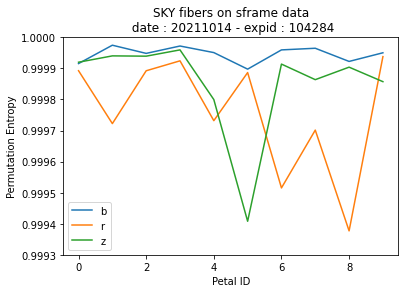

In [131]:
date = 20211014
expid = 104284
for band in ['b', 'r', 'z']:
    label = '{}_{:08d}_{}'.format(date, expid, band)
    plt.plot(entropy[label], label=band)

plt.ylim([0.9993,1])
plt.xlabel('Petal ID')
plt.ylabel('Permutation Entropy')
plt.title('SKY fibers on sframe data\n date : {} - expid : {}'.format(date, expid))
plt.legend()


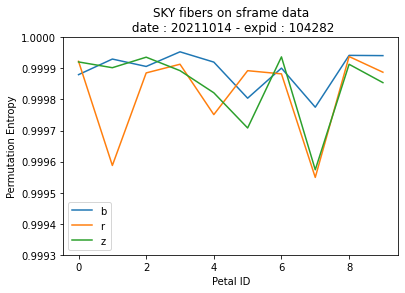

In [132]:
date = 20211014
expid = 104282
for band in ['b', 'r', 'z']:
    label = '{}_{:08d}_{}'.format(date, expid, band)
    plt.plot(entropy[label], label=band)

plt.ylim([0.9993,1])
plt.xlabel('Petal ID')
plt.ylabel('Permutation Entropy')
plt.title('SKY fibers on sframe data\n date : {} - expid : {}'.format(date, expid))
plt.legend()

In [127]:
exp_path = '/global/cfs/cdirs/desi/spectro/redux/daily/exposures/'
date = 20211010
expid = 103670

for band in ['b', 'r', 'z']:
    label = '{}_{:08d}_{}'.format(date, expid, band)
    entropy[label] = compute_camera_entropy(exp_path, date, expid, band)

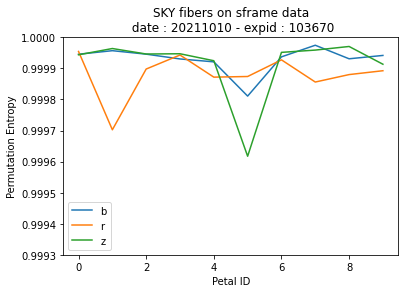

In [133]:
date = 20211010
expid = 103670
for band in ['b', 'r', 'z']:
    label = '{}_{:08d}_{}'.format(date, expid, band)
    plt.plot(entropy[label], label=band)

plt.ylim([0.9993,1])
plt.xlabel('Petal ID')
plt.ylabel('Permutation Entropy')
plt.title('SKY fibers on sframe data\n date : {} - expid : {}'.format(date, expid))
plt.legend()

In [129]:
exp_path = '/global/cfs/cdirs/desi/spectro/redux/daily/exposures/'
date = 20211010
expid = 103674

for band in ['b', 'r', 'z']:
    label = '{}_{:08d}_{}'.format(date, expid, band)
    entropy[label] = compute_camera_entropy(exp_path, date, expid, band)

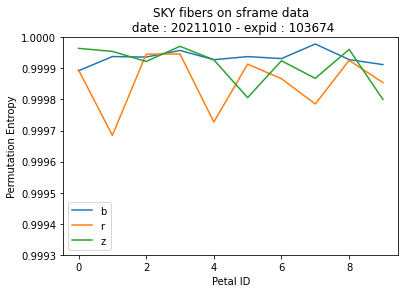

In [130]:
date = 20211010
expid = 103674
for band in ['b', 'r', 'z']:
    label = '{}_{:08d}_{}'.format(date, expid, band)
    plt.plot(entropy[label], label=band)

plt.ylim([0.9993,1])
plt.xlabel('Petal ID')
plt.ylabel('Permutation Entropy')
plt.title('SKY fibers on sframe data\n date : {} - expid : {}'.format(date, expid))
plt.legend()